# Numerische Behandlung von gewöhnlichen Differentialgleichungen
## Theoretische Grundlagen
Eine (explizite) gewöhnliche Differentialgleichung ist von der Form $y\prime=f(x,y)$, mit einer Funktion $f: \mathbb{R}\times\mathbb{R}\to\mathbb{R}$. Es wird eine $Funktion$ $y: \mathbb{R}\to\mathbb{R}$ gesucht, die einmal (stetig) differenzierbar ist und die DGL $y(x)\prime=f(x,y(x))$ erfüllt. Da diese Aufgabe unendlich viele Lösungen haben kann, wird von einem sogenannten Anfagswertproblem (AWP) gesprochen, bei dem man zusätzlich die Bedingung aufstellt, dass die Funktion $y$ einen bestimmen Anfangswert $y_0$ (meist bei $x=0$) annimmt. Die zu betrachtende Aufgabe wird üblicherweise so gestellt:

Finde ein $y\in C^1([0,\infty))$, sodass gilt:
$$y(x)\prime = f(x,y(x)),\quad\forall x\in[0,\infty) \\
y(0) = y_0$$

Je nachdem, welche Eigenschaften die rechte Seite $f$ hat, hat auch $y$ daraus ableitbare Eigenschaften (da $f$ direkte Auswirkung zumindest auf die Ableitung von $y$ hat). Sind die Eigenschaften von $f$ hinreichend gut, so ist die Aufgabe eindeutig lösbar. Ein Kriterium liefert der Satz von Picard-Lindelöf. Ist $f$ bzgl. der zweiten Variable (also die Funktion $y$) Lipschitz-stetig, so ist die Aufgabe eindeutig lösbar.

Für $f$ der Form $f(x,y) = a(x)\cdot y + b(x)$ heißt die DGL linear (falls b(x)=0 homogen, sonst inhomogen). Hängt $f$ nicht explizit von der freien Variable $x$ ab, so nennt man die DGL autonom. In diesem fall gilt für eine Lösung $y$, dass y(x-a) $(a\in\mathbb{R})$ ebenfalls Lösungen der DGL sind. 

### Beispiele

$y\prime = \lambda\cdot y$, $\lambda\in\mathbb{R}$ $(f(x,y)=\lambda\cdot y)$ ist eindeutig lösbar

$y\prime = x\cdot y$+x^2, $(f(x,y)= x\cdot y+x^2)$ ist eindeutig lösbar

$y\prime = \sin(y)$, $(f(x,y)=\sin(y))$ ist eindeutig lösbar

$y\prime = \sqrt{y}$, $(f(x,y)=\sqrt{y})$ ist NICHT eindeutig lösbar

## Stabilitätsverhalten von Lösungen von gewöhnlichen Differentialgleichungen

Unter "Stabilität" einer Lösung ist ihr Langzeitverhalten zu verstehen, vorausgesetzt, das Existenzintervall ist ausreichend groß.
Eine Lösung $y$ heißt stabil, wenn wir nur hinreichend nah am gegebenen Anfangswert starten müssen, sodass die "fehlerbehaftete" Lösung maximal $\varepsilon$ von der echten Lösung entfernt ist (und das zu jeder Stelle $x$).
In Formeln ausgedrückt bedeutet dies:

$y$ stabil genau dann wenn: $\forall\varepsilon>0\;\exists\delta>0: |y(0)-y_\delta(0)|<\delta \Rightarrow |y(x)-y_\delta(x)|<\varepsilon (\forall x\geq 0)$, wobei $y_\delta$ die Lösung der DGL mit dem um maximal $\delta$ gestörten Anfangswert ist.

Eine Lösung heißt asymptotisch stabil, falls der Fehler $|y(x)-y_\delta(x)|$ für $x\to\infty$ gegen Null geht. Damit wäre eine asymptotisch stabile Lösung auch (normal) stabil.

### Beispiele

$y\prime = 2\,y$, $y(0) = y_0$. Die spezifische Lösung zu jedem Anfangswert ist instabil. Die Lösung zu diesem AWP ist $y(x) = y_0\cdot e^{2x}$. Wird der Anfangswert um $\delta>0$ gestört, ist die dazugehörige Lösung $y_\delta(x) = (y_0+\delta)\cdot e^{2x}$, so gilt für die Differenz $|y(x)-y_\delta(x)|= |\delta e^{2x}|\to\infty (x\to\infty)$.

$y\prime = -2\,y$, $y(0) = y_0$. Die spezifische Lösung zu jedem Anfangswert ist entgegen (sogar asymptotisch) stabil. Die Lösung zu diesem AWP ist $y(x) = y_0\cdot e^{-2x}$. Wird der Anfangswert um $\delta>0$ gestört, ist die dazugehörige Lösung $y_\delta(x) = (y_0+\delta)\cdot e^{-2x}$, so gilt für die Differenz $|y(x)-y_\delta(x)|= |\delta e^{-2x}|\to 0 (x\to\infty)$.

In [1]:
# import numpy and the ODE tool box

import numpy as np
import ode_toolbox as tb

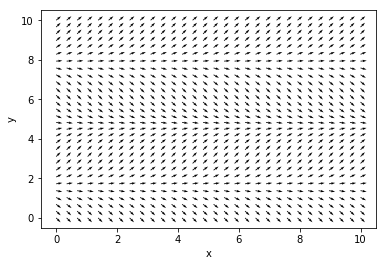

In [2]:
# create the right hand side of the equation y' = f(x,y)
f = lambda x,y: -np.cos(y)

# create variable of class 'ODE'
var = tb.ODE(f,0,10,3) # input: ODE(RHS,x0,xend,y0)

# take a look at the direction fiel of the ODE
var.directionField(0,10,0,10,30,30) # input: directionField(xmin,xmax,ymin,ymax [,nx,ny])

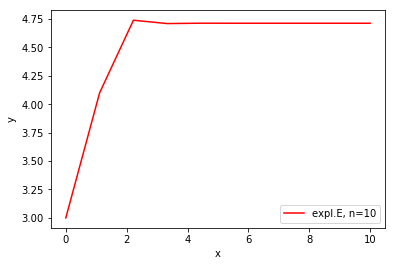

In [3]:
# solve ODE with a Solver

var.solve(10,method='explE') # input: solve(n[,method])

# look at solution
var.show()

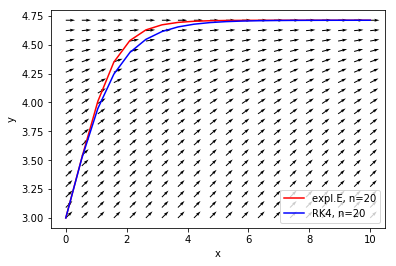

In [4]:
# clear calculated solutions...
var.clear()

# ...and start again with another solving processes
var.solve(20,method='explE') 
var.solve(20,method='RK4')

# look at solutions (now with additional direction field)
var.show(directions='on')